In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

In [4]:
df

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


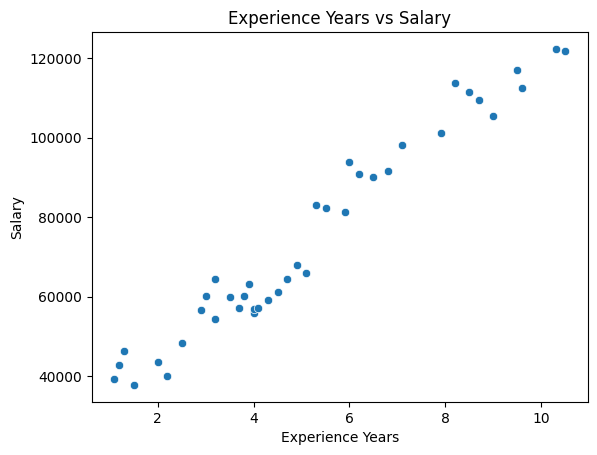

In [7]:
sns.scatterplot(x = 'Experience Years' , y = 'Salary' , data = df)
plt.title('Experience Years vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

In [8]:
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [9]:
x = df.iloc[:,0:1]
y = df.iloc[:,1]
x

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0
5,2.2
6,2.5
7,2.9
8,3.0
9,3.2


In [10]:
x_train  ,x_test , y_train ,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [11]:
print(f'X Training set size: {x_train.shape}')
print(f'Y Training set size: {y_train.shape}')
print(f'X Test set size: {x_test.shape}')
print(f'Y Test set size: {y_test.shape}')

X Training set size: (32, 1)
Y Training set size: (32,)
X Test set size: (8, 1)
Y Test set size: (8,)


In [12]:
regressor = LinearRegression()

In [13]:
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

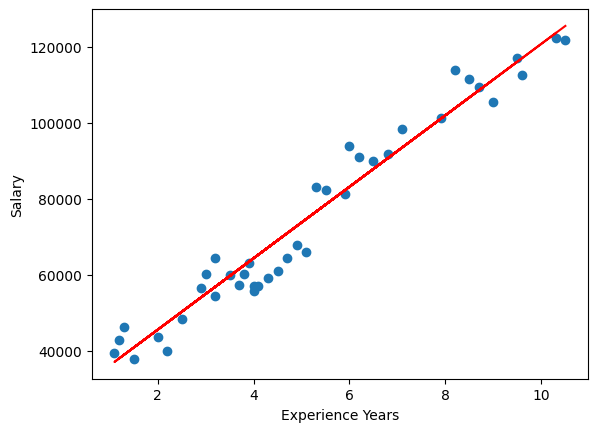

In [15]:
plt.scatter(df['Experience Years'],df['Salary'])
plt.plot(x_train , regressor.predict(x_train),color = 'red')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

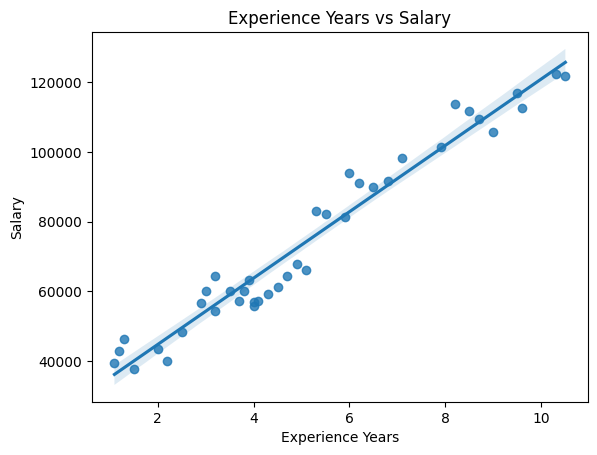

In [16]:
sns.regplot(x = 'Experience Years' , y = 'Salary' , data = df)
plt.title('Experience Years vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

In [17]:
y_pred = regressor.predict(x_test)

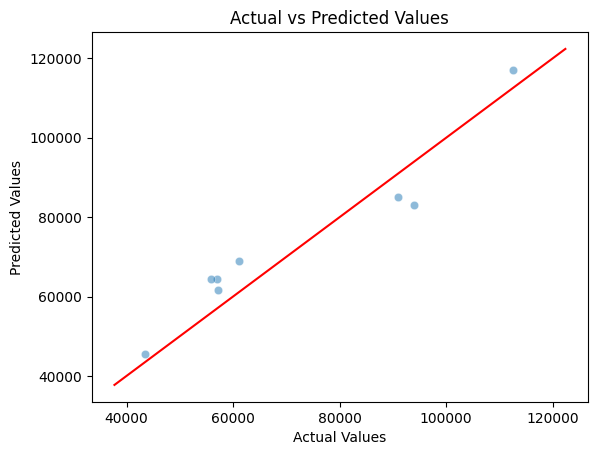

In [18]:
sns.scatterplot(x = np.array(y_test).reshape(-1) , y=np.array(y_pred).reshape(-1),alpha =0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

Residuals = actual - predicted

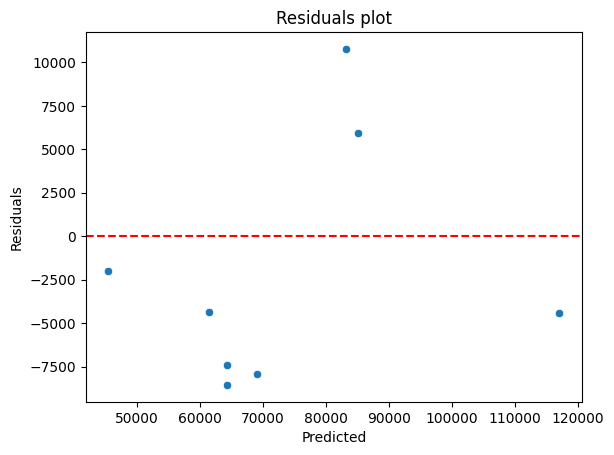

In [19]:
residuals =(np.array(y_test).reshape(-1)) - (np.array(y_pred).reshape(-1))
sns.scatterplot(x=np.array(y_pred).reshape(-1),y=residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

# Mean Absolute Error:-
![Alt Text](https://media.graphcms.com/HePGKyTHRRGVmaI8SEk2)

## Why MAE Matters?
    MAE offers several advantages that make it a valuable tool in assessing model performance:
        Robustness to Outliers: Unlike some other metrics, MAE is less sensitive to extreme values (outliers) in the    data. This makes it a suitable choice when your dataset contains outliers that might skew other metrics like Mean Squared Error (MSE).
        Interpretability: MAE is in the same unit as the original target variable, making it easy to interpret. For example, if your model predicts house prices in dollars, the MAE will also be in dollars, providing a tangible understanding of the error magnitude.
## Interpreting MAE:-
    The MAE value itself indicates the average absolute error between predicted and actual values. The smaller the MAE, the better the model’s predictions align with the actual data. A MAE of 0 would mean a perfect prediction, but in most cases, achieving such perfection is unlikely.
    It’s important to compare the MAE to the scale of the target variable. For instance, if you’re predicting house prices and your MAE is $10,000, that might be considered a good result. However, the same MAE might be unacceptable if you’re predicting temperature in degrees Celsius.
   


In [20]:
metrics.mean_absolute_error(y_test,y_pred)

6419.911069460598

# Mean Squared Error:-
    Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a regression model. It measures the average squared difference between the actual target values and the predicted values. A lower MSE indicates a better fit of the model to the data.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/07/image-37.png)

    The squaring of errors ensures that positive and negative differences do not cancel each other out. Additionally, squaring emphasizes larger errors, making MSE sensitive to outliers.

    Square of the error: Squaring ensures that negative errors (underestimation) and positive errors (overestimation) don’t cancel each other out.

    Because errors are squared before averaging, MSE is particularly sensitive to large errors. This means that models with occasional large errors will have a high MSE, reflecting poor performance.

In [21]:
MSE = metrics.mean_squared_error(y_test,y_pred)
MSE

48077731.16919359

# Root Mean Squared Error:-
    Root Mean Squared Error (RMSE) is another popular metric used to evaluate the performance of a regression model. It’s simply the square root of the Mean Squared Error (MSE), which allows the error metric to be in the same unit as the target variable, making it easier to interpret. 
![](https://miro.medium.com/v2/resize:fit:353/1*F9DzVY2PBNviGdbMPHruTQ.png)

    Same unit as target: RMSE provides an error metric in the same units as the dependent variable, making it easier to relate to real-world scenarios.

    Penalizes larger errors: Like MSE, RMSE also gives more weight to larger errors since it involves squaring the errors before taking the average.

    RMSE vs. MSE: RMSE is often preferred because it provides error in the same unit as the target variable, making it more interpretable compared to MSE.

In [22]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

6933.810724932834

# R-Squared :-
    R-squared, also known as the coefficient of determination, is a statistical measure used to assess how well a regression model fits the data. It provides an indication of the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
![](https://www.ejable.com/wp-content/uploads/2023/11/r-squared-formula.webp)

## Interpretation:-
    R2 ranges from 0 to 1.
        0 means the model explains none of the variance in the dependent variable.
        1 means the model explains all of the variance in the dependent variable.
    In Simple term An R2 value of 0.85 means 85% of the variance in the target variable is explained by the model, and the remaining 15% is due to unexplained factors (errors, noise, or omitted variables).

## Adjested R-Squared:-
    For multiple linear regression, there's a variant called Adjusted R-squared, which adjusts for the number of independent variables in the model. Adding more variables can artificially inflate R2R2, even if those variables are irrelevant. Adjusted R2R2 accounts for this by penalizing models that add more variables without improving the fit.
![](https://external-preview.redd.it/7zLAo-821pJIR9ayAbdlOZiKjLMYetgvRkiF76mAjNU.jpg?format=pjpg&auto=webp&s=9cfe21cf4ad1cd8f70dfd5b4ec77815339cf3ccc)

Doesn’t measure accuracy: A high R2 doesn’t necessarily mean the model is good; it just means that the model fits the data well. You still need to check other metrics like RMSE, MSE, or MAE to ensure the model makes good predictions.

Doesn't account for overfitting: A very complex model may have a high R2R2, but it could be overfitting the training data and may not generalize well to unseen data.

Dependent on context: What constitutes a "good" R2R2 depends on the context. For example, in social sciences, a lower R2R2 (like 0.3 or 0.4) might be considered reasonable because human behavior is hard to predict.

In [23]:
metrics.r2_score(y_test,y_pred)

0.9068577573647874

# REMINDER:-SEE THE PROOF OF LINEAR REGRESSION